<a href="https://colab.research.google.com/github/jo-cho/memos/blob/master/RL/sentdex_deep_learning_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## get Torch

In [0]:
import torch

In [6]:
x = torch.Tensor([5,3])
y = torch.Tensor([2,1])

print(x*y)

tensor([10.,  3.])


In [7]:
x = torch.zeros([2,5])
print(x)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [8]:
x.shape

torch.Size([2, 5])

In [10]:
y = torch.rand([2,5])
y

tensor([[0.0979, 0.7449, 0.7770, 0.6545, 0.4143],
        [0.8608, 0.9742, 0.5075, 0.3356, 0.8097]])

In [11]:
y.view([1,10]) #reshape

tensor([[0.0979, 0.7449, 0.7770, 0.6545, 0.4143, 0.8608, 0.9742, 0.5075, 0.3356,
         0.8097]])

In [12]:
y = y.view([1,10])
y

tensor([[0.0979, 0.7449, 0.7770, 0.6545, 0.4143, 0.8608, 0.9742, 0.5075, 0.3356,
         0.8097]])

It's similar to numpy

## Data

In [0]:
import torchvision
from torchvision import transforms, datasets
#for training for visioning

In [14]:
train = datasets.MNIST("", train=True, download= True, 
                       transform= transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST("", train=False, download= True, 
                       transform= transforms.Compose([transforms.ToTensor()])) 

0it [00:00, ?it/s]

9920512it [00:02, 3912232.04it/s]                             


Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


0it [00:00, ?it/s]

32768it [00:00, 57880.41it/s]                           
0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


1654784it [00:01, 952113.98it/s]                             
0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


8192it [00:00, 21593.56it/s]            

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


training and testing data split

- To train any machine learning model, we want to first off have training and validation datasets. This is so we can use data that the machine has never seen before to "test" the machine.

In [0]:
trainset = torch.utils.data.DataLoader(train,batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=10, shuffle=True)

# What is a batch?
# Why shuffle? --> this data is hand-write digit. generalization

iteration

In [18]:
for data in trainset:
    print(data)
    break #too many

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]],


        ...,


        [[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0

Each iteration will contain a batch of 10 elements (that was the batch size we chose), and 10 classes. Let's just look at one:

In [0]:
X, y = data[0][0], data[1][0]
# X는 input data (features) y는 label
# X는 image matrix
# y는 숫자

In [20]:
print(data[1]) #targets

tensor([4, 3, 9, 1, 2, 8, 1, 5, 2, 8])


In [22]:
# image shape be like
print(data[0][0].shape)

torch.Size([1, 28, 28])


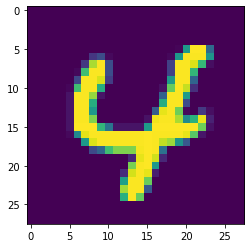

In [21]:
import matplotlib.pyplot as plt

plt.imshow(data[0][0].view(28,28)) #to show, reshape해야 함.
plt.show()

Balance

iterate over everything and make a count

In [23]:
#example

total = 0
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}


for data in trainset:
    Xs, ys = data
    for y in ys:
        counter_dict[int(y)] += 1
        total += 1

print(counter_dict)

for i in counter_dict:
    print(f"{i}: {counter_dict[i]/total*100.0}%")

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
0: 9.871666666666666%
1: 11.236666666666666%
2: 9.93%
3: 10.218333333333334%
4: 9.736666666666666%
5: 9.035%
6: 9.863333333333333%
7: 10.441666666666666%
8: 9.751666666666667%
9: 9.915000000000001%


## Building

In [0]:
import torch.nn  as nn
import torch.nn.functional as F

In [27]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()              # to aviod the errors
        self.fc1 = nn.Linear(28*28, 64) # (input,output-hiddenlayer)
        self.fc2 = nn.Linear(64, 64)    # hidden
        self.fc3 = nn.Linear(64, 64)    # hidden
        self.fc4 = nn.Linear(64, 10)    # (we have 10 classes. 마지막 ouput)

   # def forward(self, x):
   #     x = self.fc1(x)
   #     x = self.fc2(x)
   #     x = self.fc3(x)
   #     x = self.fc4(x)
   #     return x

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    # Currently, the most popular is the rectified linear, or relu, activation function.
    # Basically, these activation functions are keeping our data scaled between 0 and 1.
    # pytorch를 쓴 이유
    
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [0]:
# 이해를 위한 예시

x = torch.rand((28,28))
x = x.view(-1,28*28)

In [29]:
x

tensor([[0.2251, 0.0049, 0.1916, 0.1025, 0.5782, 0.4445, 0.9565, 0.0127, 0.8727,
         0.5016, 0.2550, 0.2391, 0.0929, 0.1938, 0.5101, 0.7392, 0.0907, 0.7442,
         0.2985, 0.2371, 0.9524, 0.5033, 0.2326, 0.2127, 0.4390, 0.7195, 0.6652,
         0.3725, 0.1160, 0.0459, 0.9759, 0.9762, 0.4202, 0.5420, 0.8283, 0.8606,
         0.3174, 0.2077, 0.5491, 0.7115, 0.1855, 0.9359, 0.5511, 0.3241, 0.3421,
         0.0181, 0.9323, 0.0807, 0.0630, 0.2734, 0.5347, 0.0657, 0.6815, 0.9564,
         0.5118, 0.7310, 0.1879, 0.7718, 0.7116, 0.3537, 0.4096, 0.6826, 0.0781,
         0.6945, 0.1794, 0.0640, 0.3415, 0.7175, 0.7275, 0.8838, 0.4966, 0.3895,
         0.7193, 0.3646, 0.4345, 0.0228, 0.3439, 0.7021, 0.9180, 0.2026, 0.5228,
         0.9862, 0.8476, 0.5943, 0.3227, 0.9251, 0.7720, 0.6222, 0.1404, 0.1562,
         0.4205, 0.4880, 0.6037, 0.4177, 0.2055, 0.6013, 0.4590, 0.9214, 0.4725,
         0.7239, 0.9447, 0.5042, 0.5423, 0.8521, 0.0644, 0.4721, 0.1015, 0.1290,
         0.4068, 0.8085, 0.1

In [30]:
output = net(x)
output

tensor([[-2.3017, -2.2334, -2.3295, -2.1728, -2.1871, -2.3154, -2.3217, -2.4331,
         -2.3408, -2.4252]], grad_fn=<LogSoftmaxBackward>)

## Training

we want to calculate loss and specify our optimizer

In [0]:
import torch.optim as optim

loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001) #lr = learning rate

For simpler tasks, a learning rate of 0.001 usually is more than fine. For more complex tasks, you will see a learning rate with what's called a decay. Basically you start the learning rate at something like 0.001, or 0.01...etc, and then over time, that learning rate gets smaller and smaller. The idea being you can initially train fast, and slowly take smaller steps, hopefully getthing the best of both worlds:

In [33]:
EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    # data is a batch of featuresets and labels
    X, y = data
    print(X[0])
    print(y[0])
    break

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

Let's go with 3 epochs for now. So we will loop over epochs, and each epoch will loop over our data.

In [34]:
for epoch in range(EPOCHS): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
        X, y = data  # X is the batch of features, y is the batch of targets.
        net.zero_grad()  # sets gradients to 0 before loss calc. You will do this likely every step.
        output = net(X.view(-1,28*28))  # pass in the reshaped batch (recall they are 28x28 atm)
        loss = F.nll_loss(output, y)  # calc and grab the loss value
        loss.backward()  # apply this loss backwards thru the network's parameters
        optimizer.step()  # attempt to optimize weights to account for loss/gradients
    
    print(loss)  # print loss. We hope loss (a measure of wrong-ness) declines! 

tensor(0.0601, grad_fn=<NllLossBackward>)
tensor(0.1563, grad_fn=<NllLossBackward>)
tensor(0.0823, grad_fn=<NllLossBackward>)


As we iterate, we get loss, which is an important metric, but we care about accuracy. So, how did we do? To test this, all we need to do is iterate over our test set, measuring for correctness by comparing output to target values.

In [35]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        output = net(X.view(-1,28*28))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", correct/total)

Accuracy:  0.9609


하나씩 해봤을 때,

In [36]:
X[0]

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

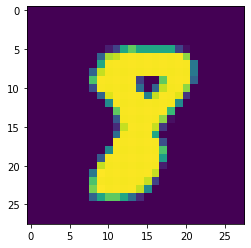

In [37]:
import matplotlib.pyplot as plt

plt.imshow(X[0].view(28,28))
plt.show()

In [38]:
print(torch.argmax(net(X[0].view(-1,784))[0]))

tensor(8)


## Reference

https://pythonprogramming.net/data-deep-learning-neural-network-pytorch/

https://pythonprogramming.net/building-deep-learning-neural-network-pytorch/

https://pythonprogramming.net/training-deep-learning-neural-network-pytorch/

Thnx to youtube channel sentdex.